***R181603K_R182562C***

# **VGG16**

***ASSIGNMENT_2***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime
from google.colab import drive
import tensorflow as tf
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mapping.csv')
videoFile = '/content/drive/MyDrive/Colab Notebooks/vidtest2.mp4'
videoFile1 = '/content/drive/MyDrive/Colab Notebooks/vidtest1.mp4'
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# GETING THE VIDEO
count = 0
videoFile = "vidtest2.mp4"
cap = cv2.VideoCapture(videoFile)   
frameRate = cap.get(5) 
x=1
while(cap.isOpened()):
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Completed!")


Completed!


In [ ]:
import os

# GETTING WORKING DIR (cwd)
cwd = os.getcwd()  
files = os.listdir(cwd)  
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'drive', 'sample_data']


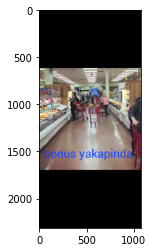

In [ ]:
#READING IMAGE FORM FILE 
img = plt.imread('/content/drive/My Drive/Colab Notebooks/Advanced_AI/frame0.jpeg')  
plt.imshow(img)

In [ ]:
 # READING THE CSV FILE
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mapping.csv')    
data.head()      

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [ ]:
# CREATE AN EMPTY ARRAY
X = [ ]     
for img_name in data.Image_ID:
    #img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [ ]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [ ]:
'''
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf')      # preprocessing the input data
'''

"\nfrom keras.applications.vgg16 import preprocess_input\nX = preprocess_input(X, mode='tf')      # preprocessing the input data\n"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [ ]:
# CONVERT TO 1D
X_train = X_train.reshape(208, 7*7*512)     
X_valid = X_valid.reshape(90, 7*7*512)

In [ ]:
#CENTRE TE DATA
train = X_train/X_train.max()     
X_valid = X_valid/X_train.max()

In [ ]:
#BUILDING THE MODEL
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#COMPILING THE MODEL
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#TRAINING THE MODEL
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 1s 43ms/step - loss: 1.4802 - accuracy: 0.3508 - val_loss: 1.3664 - val_accuracy: 0.2444
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 1.4007 - accuracy: 0.2906 - val_loss: 1.2201 - val_accuracy: 0.3667
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 1.2067 - accuracy: 0.3580 - val_loss: 1.1170 - val_accuracy: 0.3889
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 1.1323 - accuracy: 0.3489 - val_loss: 1.0984 - val_accuracy: 0.3889
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0834 - accuracy: 0.4349 - val_loss: 1.1075 - val_accuracy: 0.3667
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 1.1082 - accuracy: 0.3532 - val_loss: 1.1456 - val_accuracy: 0.3889
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 1.0854 - accuracy: 0.3961 - val_loss: 1.0908 - val_accuracy: 0.3889
Epoch 8/100
7/7 [===

In [ ]:
count = 0
videoFile = "vidtest2.mp4"
cap = cv2.VideoCapture(videoFile)
#frame rate
frameRate = cap.get(5) 
x=1
while(cap.isOpened()):
    #current frame number
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Complete!")


Complete!


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [ ]:
test.head()

,Image_ID
0,test0.jpg
1,test1.jpg
2,test2.jpg
3,test3.jpg
4,test4.jpg


In [ ]:
test_image = []
for img_name in test.Image_ID:
    #img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:

# PREPROCESSING THE IMAGE
#test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()


In [ ]:
predictions = model.predict_classes(test_image)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("The trolley guy performs for ", predictions[predictions==1].shape[0], "msec")
print("The trolley guy performs for ", predictions[predictions==2].shape[0], "msec")

The trolley guy performs for  0 msec
The trolley guy performs for  186 msec


In [1]:
##Configuring streamlit 

In [3]:
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.7/dist-packages (5.5.5)


In [5]:
!pip install -q streamlit

In [6]:
!pip -q install pyngrok

     |████████████████████████████████| 747kB 33.1MB/s 


In [33]:
!ngrok authtoken 1uEH9Om0tak44DfoXNucNIOaaWX_7yNbWHGJezQKJuSG1yYMC

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
from pyngrok import ngrok

In [41]:
%%writefile vgg16.py

import streamlit as st
import cv2 
import math 
import tempfile    
import pandas as pd

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from PIL import Image 

st.title("Object Detection Using VGG16")

def uploadFile():
  vid_file = st.file_uploader("Upload a video", type=["mp4", "mov","avi"])
  tempVideo = tempfile.NamedTemporaryFile(delete=False) 
  if vid_file is not None: 
    tempVideo.write(vid_file.read())
  return tempVideo.name

def splitVideo(videoPath):
  count = 0
  cap = cv2.VideoCapture(videoPath)
  frameRate = cap.get(5) 
  tempImage = tempfile.NamedTemporaryFile(delete=False) 
  x=1

  while (cap.isOpened()):
    frameId = cap.get(1) 
    ret, frame = cap.read()
    if (ret != True):
      break
    if (frameId % math.floor(frameRate) == 0):
      tempImage = videoPath.split('.')[0] +"_frame%d.jpg" % count;count+=1
      cv2.imwrite(tempImage, frame)
      frames.append(tempImage)
  cap.release() 
  return frames,count

def classifyObjects():  
  model = VGG16()
  classify = []
  frames,count = splitVideo(videoFile)

  for i in range(count):    
    image = load_img(frames[i], target_size=(224, 224)) 
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)   
    img_pred = model.predict(image)
    label = decode_predictions(img_pred)    
    label = label[0][0]
    result =  label[1]
    classify.append(result)
  return classify

def searchInFrames(object_):
  indeces = []
  classifications = classifyObjects()
  if object_ in classifications:
    for i in range(len(classifications)):
      if classifications[i] == object_:
        index = classifications.index(object_)
        indeces.append(index)
        filePath = frames[index]
        img = load_img(filePath, target_size = (224, 224))
        detected_paths.append(filePath)
    for i in range(len(indeces)):
      st.image(frames[i], width=224)
  else:
    st.write("The object you are searching for is not available in the video.")

videoFile = uploadFile()
user_input = st.text_input("Enter the object you are searching: ")

if st.button('Search'):  
  frames =[]
  detected_paths = []
  searchInFrames(user_input)
  st.write("")




Overwriting vgg16.py


In [42]:
!streamlit run --server.port 80 vgg16.py &>/dev/null&

In [45]:
public_url = ngrok.connect(port='8501') 

In [46]:
public_url

<NgrokTunnel: "http://cd6d47100da9.ngrok.io" -> "http://localhost:80">

In [44]:
ngrok.kill()